In [1]:
import ROOT
import random
import array
import sys
import os
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.24/00


In [2]:
chain = ROOT.TChain('Events')
chain.Add("SkimTree_1.root")
chain.Add("SkimTree_2.root")
chain.Add("SkimTree_3.root")
chain.Add("SkimTree_4.root")
chain.Add("SkimTree_5.root")
chain.Add("SkimTree_6.root")
chain.Add("SkimTree_7.root")
chain.Add("SkimTree_8.root")
chain.Add("SkimTree_9.root")
chain.Add("SkimTree_10.root")
chain.Add("SkimTree_11.root")
chain.Add("SkimTree_12.root")
chain.Add("SkimTree_13.root")
chain.Add("SkimTree_14.root")
chain.Add("SkimTree_15.root")
chain.Add("SkimTree_16.root")
chain.Add("SkimTree_17.root")
chain.Add("SkimTree_18.root")
chain.Add("SkimTree_19.root")

1

In [3]:
binEdge = [0,6,10,17,20,28,33,38,43,48,60,200]
n = len(binEdge) - 1
print(n)

11


In [4]:
invmass = ROOT.TH1F('invmass', 'invmass of all probe candidates', 500, 40, 140)

In [5]:
invmass_pr1 = ROOT.TH1F('invmass_pr1', 'invariant mass_pr1', 500, 40, 140)
invmass_pr2 = ROOT.TH1F('invmass_pr2', 'invariant mass_pr2', 500, 40, 140)
invmass_pr3 = ROOT.TH1F('invmass_pr3', 'invariant mass_pr3', 500, 40, 140)
invmass_pr4 = ROOT.TH1F('invmass_pr4', 'invariant mass_pr4', 500, 40, 140)
invmass_pr5 = ROOT.TH1F('invmass_pr5', 'invariant mass_pr5', 500, 40, 140)
invmass_pr6 = ROOT.TH1F('invmass_pr6', 'invariant mass_pr6', 500, 40, 140)
invmass_pr7 = ROOT.TH1F('invmass_pr7', 'invariant mass_pr7', 500, 40, 140)
invmass_pr8 = ROOT.TH1F('invmass_pr8', 'invariant mass_pr8', 500, 40, 140)
invmass_pr9 = ROOT.TH1F('invmass_pr9', 'invariant mass_pr9', 500, 40, 140)
invmass_pr10 = ROOT.TH1F('invmass_pr10', 'invariant mass_pr10', 500, 40, 140)
invmass_pr11 = ROOT.TH1F('invmass_pr11', 'invariant mass_pr11', 500, 40, 140)

invmass_pr1_c = ROOT.TH1F('invmass_pr1_c', 'invariant mass_pr1_after_cut', 500, 40, 140)
invmass_pr2_c = ROOT.TH1F('invmass_pr2_c', 'invariant mass_pr2_after_cut', 500, 40, 140)
invmass_pr3_c = ROOT.TH1F('invmass_pr3_c', 'invariant mass_pr3_after_cut', 500, 40, 140)
invmass_pr4_c = ROOT.TH1F('invmass_pr4_c', 'invariant mass_pr4_after_cut', 500, 40, 140)
invmass_pr5_c = ROOT.TH1F('invmass_pr5_c', 'invariant mass_pr5_after_cut', 500, 40, 140)
invmass_pr6_c = ROOT.TH1F('invmass_pr6_c', 'invariant mass_pr6_after_cut', 500, 40, 140)
invmass_pr7_c = ROOT.TH1F('invmass_pr7_c', 'invariant mass_pr7_after_cut', 500, 40, 140)
invmass_pr8_c = ROOT.TH1F('invmass_pr8_c', 'invariant mass_pr8_after_cut', 500, 40, 140)
invmass_pr9_c = ROOT.TH1F('invmass_pr9_c', 'invariant mass_pr9_after_cut', 500, 40, 140)
invmass_pr10_c = ROOT.TH1F('invmass_pr10_c', 'invariant mass_pr10_after_cut', 500, 40, 140)
invmass_pr11_c = ROOT.TH1F('invmass_pr11_c', 'invariant mass_pr11_after_cut', 500, 40, 140)

In [6]:
tagpt_invmass = ROOT.TH2D('tagpt_invmass', 'invariant mass Vs tag_pt', 50,0,200,50,40,140)
probept_invmass = ROOT.TH2D('probept_invmass', 'invariant mass Vs probe_pt', 50,0,200,50,40,140)
tagpt_probept = ROOT.TH2D('tagpt_tagpt', 'tag_pt Vs probe_pt', 50,0,200,50,0,200)

In [7]:
for i, entry in enumerate(chain):
#     if i == 100000:
#         break
    if i%100000 == 0:
        print('Events Crossed: ', i)
    
    mu_pts_per_event    = list(entry.Muon_pt)
    mu_etas_per_event   = list(entry.Muon_eta)
    mu_phis_per_event   = list(entry.Muon_phi)
    mu_mass_per_event   = list(entry.Muon_mass)
    mu_charge_per_event = list(entry.Muon_charge)
    mu_dxy_per_event    = list(entry.Muon_dxy)
    mu_dz_per_event     = list(entry.Muon_dz)
    mu_ip3d_per_event   = list(entry.Muon_ip3d)
    mu_iso_per_event    = list(entry.Muon_pfRelIso04_all)
    mu_tid_per_event    = list(entry.Muon_tightId)
    
    
    mu_clean_idxs = []
    for i in range(len(mu_pts_per_event)):
        
        if mu_pts_per_event[i] < 22:
            continue
        if abs(mu_etas_per_event[i]) > 2.4:
            continue
        if mu_iso_per_event[i] > 0.3:
            continue
        if mu_tid_per_event[i] < 0.9:
            continue
        mu_clean_idxs.append(i)
        
        
    if len(mu_clean_idxs) < 1:                              # Passing those events which at least have one Tag-Muon
        continue
        
    random.shuffle(mu_clean_idxs)                           # Randomizing the clean muon indices.
    
    tag_idxs = mu_clean_idxs[0]                             # Setting the first index of clean muons as the tag muon
    
    Tp4 = ROOT.TLorentzVector()                             # Finding the 4-momentum of Tag-Muon.
    Tp4.SetPtEtaPhiM(mu_pts_per_event[tag_idxs], 
                    mu_etas_per_event[tag_idxs], 
                    mu_phis_per_event[tag_idxs], 
                    mu_mass_per_event[tag_idxs])
    
    
    
    random.shuffle(mu_pts_per_event)                        # Randomizing the pts of all muons in the event.
    
    for k in range(len(mu_pts_per_event)):
        if k != tag_idxs:
            if mu_charge_per_event[k] * mu_charge_per_event[tag_idxs] < 0:  # tag and probe should have opposite charge
                                                                             
                Pp4 = ROOT.TLorentzVector()                  # Finding 4-momentum of Probe-muon
                Pp4.SetPtEtaPhiM(mu_pts_per_event[k], 
                                mu_etas_per_event[k], 
                                mu_phis_per_event[k], 
                                mu_mass_per_event[k])
                
                if (Pp4.DeltaR(Tp4)) > 0.4:
                
                    invm = (Tp4 + Pp4).M()                       # Invariant mass of Tag and Probe
                    if 60 < invm < 120:
                        invmass.Fill(invm)
                        tagpt_invmass.Fill(mu_pts_per_event[tag_idxs], invm)
                        probept_invmass.Fill(mu_pts_per_event[k], invm)
                        tagpt_probept.Fill(mu_pts_per_event[k],mu_pts_per_event[tag_idxs])
                        if 0 < mu_pts_per_event[k] < 6:
                            invmass_pr1.Fill(invm)
                        if 6 < mu_pts_per_event[k] < 10:
                            invmass_pr2.Fill(invm)
                        if 10 < mu_pts_per_event[k] < 17:
                            invmass_pr3.Fill(invm)
                        if 17 < mu_pts_per_event[k] < 20:
                            invmass_pr4.Fill(invm)
                        if 20 < mu_pts_per_event[k] < 28:
                            invmass_pr5.Fill(invm)
                        if 28 < mu_pts_per_event[k] < 33:
                            invmass_pr6.Fill(invm)
                        if 33 < mu_pts_per_event[k] < 38:
                            invmass_pr7.Fill(invm)
                        if 38 < mu_pts_per_event[k] < 43:
                            invmass_pr8.Fill(invm)
                        if 43 < mu_pts_per_event[k] < 48:
                            invmass_pr9.Fill(invm)
                        if 48 < mu_pts_per_event[k] < 60:
                            invmass_pr10.Fill(invm)
                        if 60 < mu_pts_per_event[k] < 200:
                            invmass_pr11.Fill(invm)


                        if mu_tid_per_event[k] > 0.9 and mu_iso_per_event[k] < 0.3:
                            if 0 < mu_pts_per_event[k] < 6:
                                invmass_pr1_c.Fill(invm)
                            if 6 < mu_pts_per_event[k] < 10:
                                invmass_pr2_c.Fill(invm)
                            if 10 < mu_pts_per_event[k] < 17:
                                invmass_pr3_c.Fill(invm)
                            if 17 < mu_pts_per_event[k] < 20:
                                invmass_pr4_c.Fill(invm)
                            if 20 < mu_pts_per_event[k] < 28:
                                invmass_pr5_c.Fill(invm)
                            if 28 < mu_pts_per_event[k] < 33:
                                invmass_pr6_c.Fill(invm)
                            if 33 < mu_pts_per_event[k] < 38:
                                invmass_pr7_c.Fill(invm)
                            if 38 < mu_pts_per_event[k] < 43:
                                invmass_pr8_c.Fill(invm)
                            if 43 < mu_pts_per_event[k] < 48:
                                invmass_pr9_c.Fill(invm)
                            if 48 < mu_pts_per_event[k] < 60:
                                invmass_pr10_c.Fill(invm)
                            if 60 < mu_pts_per_event[k] < 200:
                                invmass_pr11_c.Fill(invm)

Events Crossed:  0
Events Crossed:  100000
Events Crossed:  200000
Events Crossed:  300000
Events Crossed:  400000
Events Crossed:  500000
Events Crossed:  600000
Events Crossed:  700000
Events Crossed:  800000
Events Crossed:  900000
Events Crossed:  1000000
Events Crossed:  1100000
Events Crossed:  1200000
Events Crossed:  1300000
Events Crossed:  1400000
Events Crossed:  1500000
Events Crossed:  1600000
Events Crossed:  1700000
Events Crossed:  1800000
Events Crossed:  1900000
Events Crossed:  2000000
Events Crossed:  2100000
Events Crossed:  2200000
Events Crossed:  2300000
Events Crossed:  2400000
Events Crossed:  2500000
Events Crossed:  2600000
Events Crossed:  2700000
Events Crossed:  2800000
Events Crossed:  2900000
Events Crossed:  3000000
Events Crossed:  3100000
Events Crossed:  3200000
Events Crossed:  3300000
Events Crossed:  3400000
Events Crossed:  3500000
Events Crossed:  3600000
Events Crossed:  3700000
Events Crossed:  3800000
Events Crossed:  3900000
Events Crossed:

Events Crossed:  32000000
Events Crossed:  32100000
Events Crossed:  32200000
Events Crossed:  32300000
Events Crossed:  32400000
Events Crossed:  32500000
Events Crossed:  32600000
Events Crossed:  32700000
Events Crossed:  32800000
Events Crossed:  32900000
Events Crossed:  33000000
Events Crossed:  33100000
Events Crossed:  33200000
Events Crossed:  33300000
Events Crossed:  33400000
Events Crossed:  33500000
Events Crossed:  33600000
Events Crossed:  33700000
Events Crossed:  33800000
Events Crossed:  33900000
Events Crossed:  34000000
Events Crossed:  34100000
Events Crossed:  34200000
Events Crossed:  34300000
Events Crossed:  34400000
Events Crossed:  34500000
Events Crossed:  34600000
Events Crossed:  34700000
Events Crossed:  34800000
Events Crossed:  34900000
Events Crossed:  35000000
Events Crossed:  35100000
Events Crossed:  35200000
Events Crossed:  35300000
Events Crossed:  35400000
Events Crossed:  35500000
Events Crossed:  35600000
Events Crossed:  35700000
Events Cross

0.051115650711601186


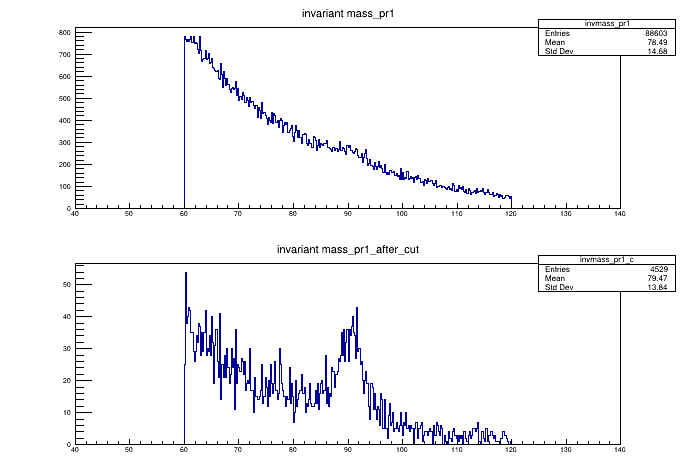

In [8]:
ratio = []

t1 = ROOT.TCanvas()
t1.Divide(1,2)
t1.cd(1)
invmass_pr1.Draw()
t1.cd(2)
invmass_pr1_c.Draw()
t1.Draw()

print(invmass_pr1_c.Integral()/invmass_pr1.Integral())
ratio.append(invmass_pr1_c.Integral()/invmass_pr1.Integral())

0.24027509915941925


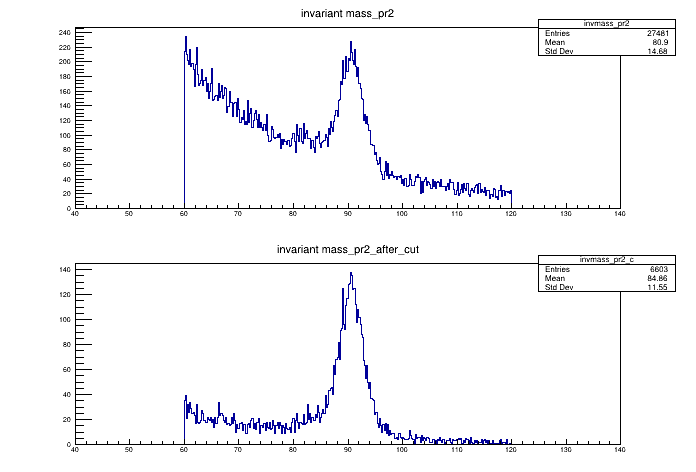

In [9]:
t2 = ROOT.TCanvas()
t2.Divide(1,2)
t2.cd(1)
invmass_pr2.Draw()
t2.cd(2)
invmass_pr2_c.Draw()
t2.Draw()

print(invmass_pr2_c.Integral()/invmass_pr2.Integral())
ratio.append(invmass_pr2_c.Integral()/invmass_pr2.Integral())

0.5639748652802365


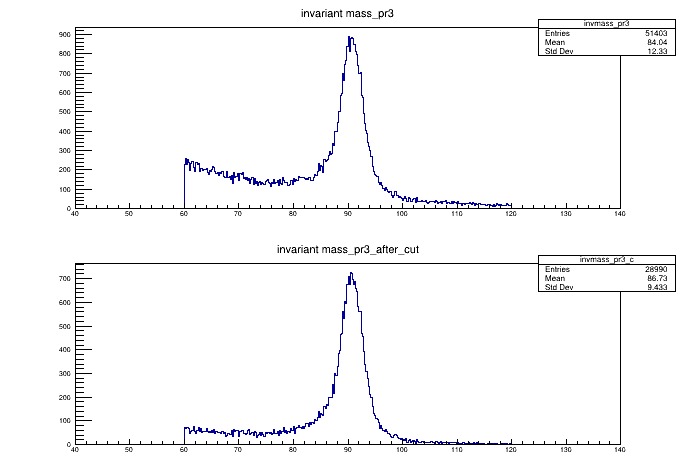

In [10]:
t3 = ROOT.TCanvas()
t3.Divide(1,2)
t3.cd(1)
invmass_pr3.Draw()
t3.cd(2)
invmass_pr3_c.Draw()
t3.Draw()

print(invmass_pr3_c.Integral()/invmass_pr3.Integral())
ratio.append(invmass_pr3_c.Integral()/invmass_pr3.Integral())

0.7231034979127681


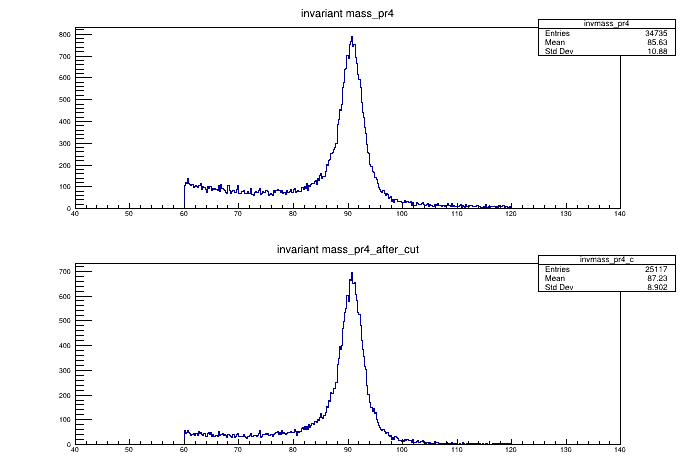

In [11]:
t4 = ROOT.TCanvas()
t4.Divide(1,2)
t4.cd(1)
invmass_pr4.Draw()
t4.cd(2)
invmass_pr4_c.Draw()
t4.Draw()

print(invmass_pr4_c.Integral()/invmass_pr4.Integral())
ratio.append(invmass_pr4_c.Integral()/invmass_pr4.Integral())

0.6345484485234438


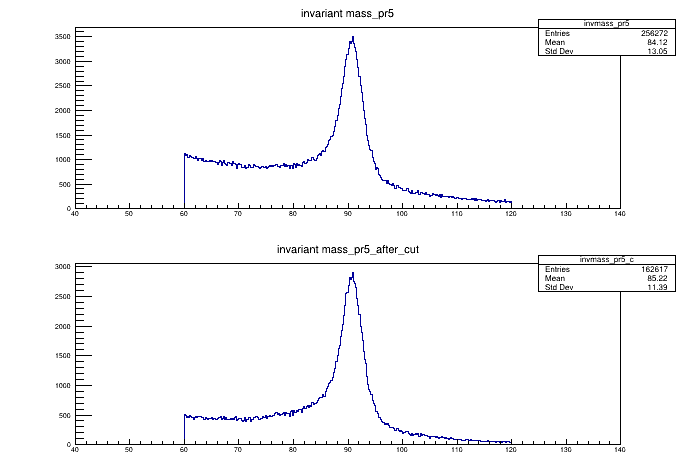

In [12]:
t5 = ROOT.TCanvas()
t5.Divide(1,2)
t5.cd(1)
invmass_pr5.Draw()
t5.cd(2)
invmass_pr5_c.Draw()
t5.Draw()

print(invmass_pr5_c.Integral()/invmass_pr5.Integral())
ratio.append(invmass_pr5_c.Integral()/invmass_pr5.Integral())

0.6571238472488704


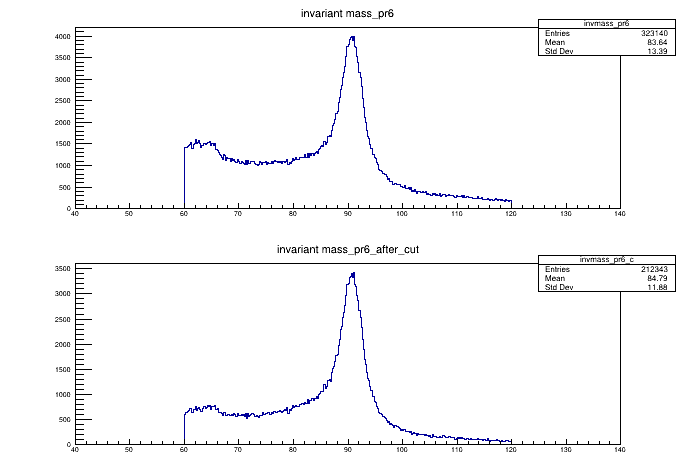

In [13]:
t6 = ROOT.TCanvas()
t6.Divide(1,2)
t6.cd(1)
invmass_pr6.Draw()
t6.cd(2)
invmass_pr6_c.Draw()
t6.Draw()

print(invmass_pr6_c.Integral()/invmass_pr6.Integral())
ratio.append(invmass_pr6_c.Integral()/invmass_pr6.Integral())

0.7025445105674332


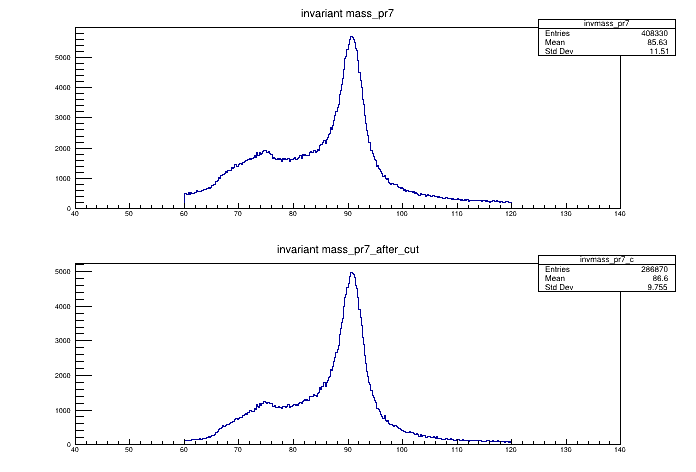

In [14]:
t7 = ROOT.TCanvas()
t7.Divide(1,2)
t7.cd(1)
invmass_pr7.Draw()
t7.cd(2)
invmass_pr7_c.Draw()
t7.Draw()

print(invmass_pr7_c.Integral()/invmass_pr7.Integral())
ratio.append(invmass_pr7_c.Integral()/invmass_pr7.Integral())

0.7662072954439225


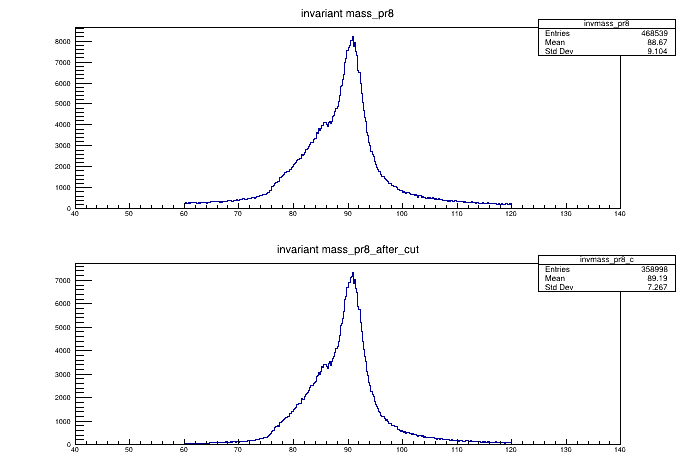

In [15]:
t8 = ROOT.TCanvas()
t8.Divide(1,2)
t8.cd(1)
invmass_pr8.Draw()
t8.cd(2)
invmass_pr8_c.Draw()
t8.Draw()

print(invmass_pr8_c.Integral()/invmass_pr8.Integral())
ratio.append(invmass_pr8_c.Integral()/invmass_pr8.Integral())

0.8190975236836646


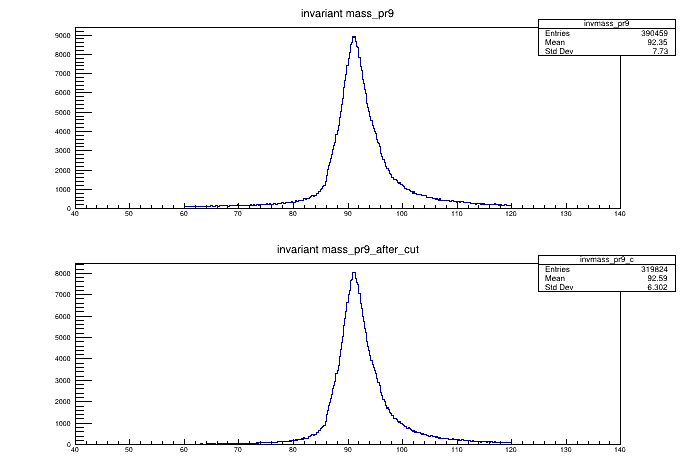

In [16]:
t9 = ROOT.TCanvas()
t9.Divide(1,2)
t9.cd(1)
invmass_pr9.Draw()
t9.cd(2)
invmass_pr9_c.Draw()
t9.Draw()

print(invmass_pr9_c.Integral()/invmass_pr9.Integral())
ratio.append(invmass_pr9_c.Integral()/invmass_pr9.Integral())

0.767608815005803


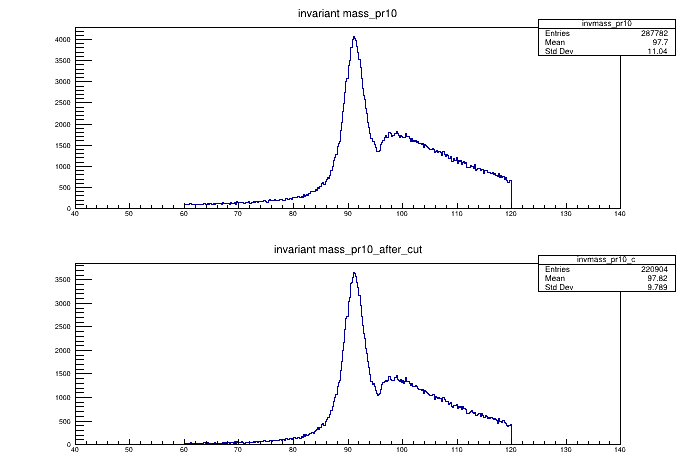

In [17]:
t10 = ROOT.TCanvas()
t10.Divide(1,2)
t10.cd(1)
invmass_pr10.Draw()
t10.cd(2)
invmass_pr10_c.Draw()
t10.Draw()

print(invmass_pr10_c.Integral()/invmass_pr10.Integral())
ratio.append(invmass_pr10_c.Integral()/invmass_pr10.Integral())

0.7393956656934653


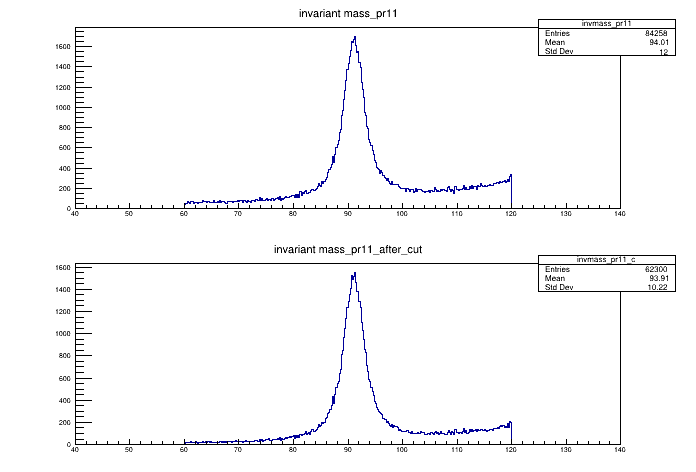

In [18]:
t11 = ROOT.TCanvas()
t11.Divide(1,2)
t11.cd(1)
invmass_pr11.Draw()
t11.cd(2)
invmass_pr11_c.Draw()
t11.Draw()

print(invmass_pr11_c.Integral()/invmass_pr11.Integral())
ratio.append(invmass_pr11_c.Integral()/invmass_pr11.Integral())

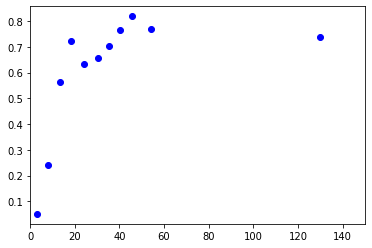

In [19]:
x = []
y = []
for i in range(len(ratio)):
    y.append(ratio[i])
    x.append((binEdge[i]+binEdge[i+1])/2)
plt.scatter(x,y, c='b')
plt.xlim(0,150)
plt.show()

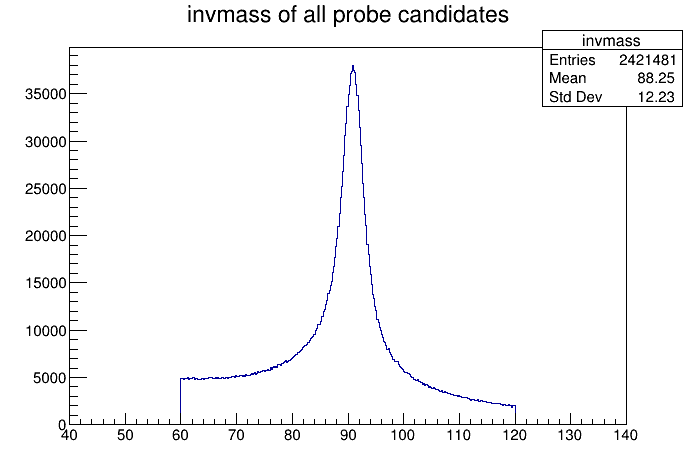

In [20]:
T1 = ROOT.TCanvas()
invmass.Draw()
T1.Draw()

In [21]:
TP_hist = ROOT.TFile('TP_histograms', "RECREATE")
invmass_pr1.Write()
invmass_pr2.Write()
invmass_pr3.Write()
invmass_pr4.Write()
invmass_pr5.Write()
invmass_pr6.Write()
invmass_pr7.Write()
invmass_pr8.Write()
invmass_pr9.Write()
invmass_pr10.Write()
invmass_pr11.Write()

1341

In [28]:
TP_hist.Close()

In [23]:
TP_hist_cut = ROOT.TFile('TP_histograms_after_cut', "RECREATE")
invmass_pr1_c.Write()
invmass_pr2_c.Write()
invmass_pr3_c.Write()
invmass_pr4_c.Write()
invmass_pr5_c.Write()
invmass_pr6_c.Write()
invmass_pr7_c.Write()
invmass_pr8_c.Write()
invmass_pr9_c.Write()
invmass_pr10_c.Write()
invmass_pr111_c.Write()

1355

In [29]:
TP_hist_cut.Close()

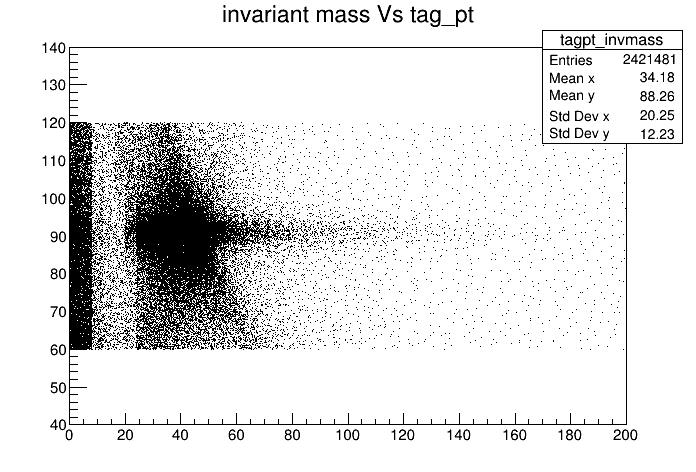

In [25]:
T2 = ROOT.TCanvas()
tagpt_invmass.Draw()
T2.Draw()

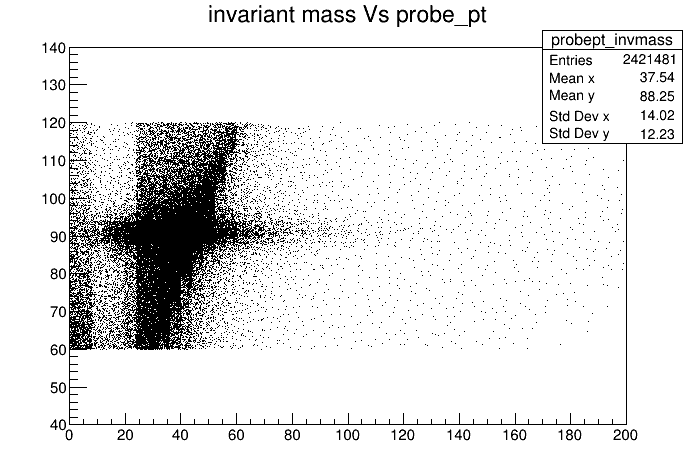

In [26]:
T3 = ROOT.TCanvas()
probept_invmass.Draw()
T3.Draw()

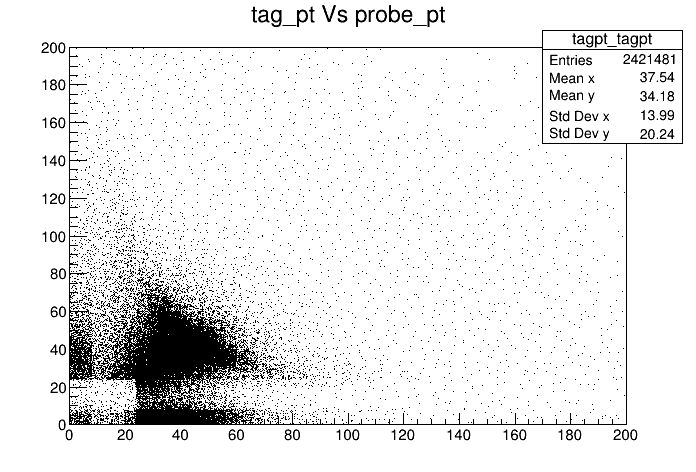

In [27]:
T4 = ROOT.TCanvas()
tagpt_probept.Draw()
T4.Draw()